In [1]:
import numpy as np  # for handling multi-dimensional array operation
import pandas as pd  # for reading data from csv 
import statsmodels.api as sm  # for finding the p-value
from sklearn.preprocessing import MinMaxScaler  # for normalization
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle
from sklearn import svm
from numpy import mean
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold

## LABEVENTS DATA

In [2]:
lab24 = pd.read_csv('./lab24.csv')

#EXTRACT FEATURES AND LABELS
Y24 = lab24['aki_flag'] 
X24 = lab24.iloc[:,2:] 

#FILL MISSING WITH MEAN IMPUTATION
X24 = X24.fillna(X24.mean())

#NORMALIZATION WITH MIN-MAX SCALER 0-1
scaler = MinMaxScaler()
X24 = scaler.fit_transform(X24)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train24, X_test24, y_train24, y_test24 = tts(X24, Y24, test_size=0.3, random_state=42)

In [3]:
lab48 = pd.read_csv('./lab48.csv')

Y48 = lab48['aki_flag'] #all rows of 'aki_flag' as LABELS
X48 = lab48.iloc[:,2:]  #features

#FILL MISSING WITH MEAN IMPUTATION
X48 = X48.fillna(X48.mean())

#NORMALIZATION WITH MIN-MAX SCALER 0-1
X48 = scaler.fit_transform(X48)

#SPLIT DATASET INTO TRAINING AND TESTING SETS
X_train48, X_test48, y_train48, y_test48 = tts(X48, Y48, test_size=0.3, random_state=42)

In [4]:
#APPLY THE SMOTE TOMEK-LINKS TECHNIQUE TO COPE WITH CLASS IMBALANCE PROBLEM 
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

#DEFINE THE PARAMETERS TO BE TESTED IN THE GRID SEARCH
params = [
  {'C': [0.1, 0.5, 0.75, 1, 10 ], 'kernel': ['poly'], 'degree': [1,2,3,4,6]},
  {'C': [0.1, 0.5, 0.75, 1, 10 ], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1]},
] 

In [5]:
gs24 = GridSearchCV(svm.SVC(), params, refit = True, verbose = 3)
p24 = Pipeline(steps=[('r', resample), ('gs', gs24)])

gs48 = GridSearchCV(svm.SVC(), params, refit = True, verbose = 3)
p48 = Pipeline(steps=[('r', resample), ('gs', gs48)])

Now fit the grid search and extract the best parameters/estimator to be used fro the prediction 

In [6]:
gs24.fit(X_train24, y_train24)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.705 total time=  56.7s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.705 total time= 1.1min
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.705 total time= 1.4min
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.705 total time= 1.3min
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.705 total time= 1.3min
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.705 total time= 1.5min
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.705 total time= 1.6min
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.705 total time= 1.5min
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.705 total time= 1.6min
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.705 total time= 1.5min
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.704 total time= 1.6min
[CV 2/5] END ......C=0.1, degree=3, kernel=poly

[CV 2/5] END .......C=10, degree=1, kernel=poly;, score=0.705 total time= 1.5min
[CV 3/5] END .......C=10, degree=1, kernel=poly;, score=0.705 total time= 4.3min
[CV 4/5] END .......C=10, degree=1, kernel=poly;, score=0.705 total time= 3.3min
[CV 5/5] END .......C=10, degree=1, kernel=poly;, score=0.705 total time= 4.1min
[CV 1/5] END .......C=10, degree=2, kernel=poly;, score=0.707 total time= 2.2min
[CV 2/5] END .......C=10, degree=2, kernel=poly;, score=0.707 total time= 2.6min
[CV 3/5] END .......C=10, degree=2, kernel=poly;, score=0.708 total time= 2.0min
[CV 4/5] END .......C=10, degree=2, kernel=poly;, score=0.705 total time= 2.2min
[CV 5/5] END .......C=10, degree=2, kernel=poly;, score=0.706 total time= 2.3min
[CV 1/5] END .......C=10, degree=3, kernel=poly;, score=0.711 total time= 3.1min
[CV 2/5] END .......C=10, degree=3, kernel=poly;, score=0.708 total time= 3.5min
[CV 3/5] END .......C=10, degree=3, kernel=poly;, score=0.705 total time= 3.3min
[CV 4/5] END .......C=10, de

[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.706 total time= 1.1min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.703 total time= 1.1min
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.705 total time= 1.0min
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.705 total time= 1.0min
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.705 total time= 1.0min
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.705 total time=  59.8s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.705 total time= 1.0min
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.705 total time= 1.1min
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.705 total time= 1.1min
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.705 total time= 1.1min
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.705 total time= 1.1min
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.705 total time= 1.1min
[CV 1/5] END .......C=10, ga

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 0.5, 0.75, 1, 10],
                          'degree': [1, 2, 3, 4, 6], 'kernel': ['poly']},
                         {'C': [0.1, 0.5, 0.75, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}],
             verbose=3)

In [7]:
print("The best parameters found for the 24h DCW:")
print(gs24.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 24h DCW:")
print(gs24.best_estimator_)

The best parameters found for the 24h DCW:
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
The best estimator found for the 24h DCW:
SVC(C=10, gamma=1)


In [8]:
gs48.fit(X_train48, y_train48)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.764 total time=   9.5s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.764 total time=   9.2s
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.763 total time=   9.4s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.764 total time=   9.7s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.764 total time=   9.1s
[CV 1/5] END ......C=0.1, degree=2, kernel=poly;, score=0.764 total time=  14.5s
[CV 2/5] END ......C=0.1, degree=2, kernel=poly;, score=0.764 total time=  15.3s
[CV 3/5] END ......C=0.1, degree=2, kernel=poly;, score=0.763 total time=  15.3s
[CV 4/5] END ......C=0.1, degree=2, kernel=poly;, score=0.764 total time=  14.5s
[CV 5/5] END ......C=0.1, degree=2, kernel=poly;, score=0.764 total time=  15.2s
[CV 1/5] END ......C=0.1, degree=3, kernel=poly;, score=0.762 total time=  15.5s
[CV 2/5] END ......C=0.1, degree=3, kernel=poly

[CV 2/5] END .......C=10, degree=1, kernel=poly;, score=0.764 total time=  16.4s
[CV 3/5] END .......C=10, degree=1, kernel=poly;, score=0.763 total time=  17.0s
[CV 4/5] END .......C=10, degree=1, kernel=poly;, score=0.764 total time=  14.9s
[CV 5/5] END .......C=10, degree=1, kernel=poly;, score=0.764 total time=  15.1s
[CV 1/5] END .......C=10, degree=2, kernel=poly;, score=0.763 total time=  52.2s
[CV 2/5] END .......C=10, degree=2, kernel=poly;, score=0.764 total time= 1.1min
[CV 3/5] END .......C=10, degree=2, kernel=poly;, score=0.765 total time= 1.2min
[CV 4/5] END .......C=10, degree=2, kernel=poly;, score=0.763 total time=  45.1s
[CV 5/5] END .......C=10, degree=2, kernel=poly;, score=0.764 total time= 1.1min
[CV 1/5] END .......C=10, degree=3, kernel=poly;, score=0.761 total time= 1.4min
[CV 2/5] END .......C=10, degree=3, kernel=poly;, score=0.762 total time= 1.7min
[CV 3/5] END .......C=10, degree=3, kernel=poly;, score=0.766 total time= 2.0min
[CV 4/5] END .......C=10, de

[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.764 total time=  30.4s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.764 total time=  31.2s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=  25.4s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=  26.8s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.763 total time=  25.6s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=  24.1s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.764 total time=  25.6s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=  29.6s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=  25.3s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.763 total time=  26.4s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=  25.5s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.764 total time=  25.2s
[CV 1/5] END .......C=10, ga

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 0.5, 0.75, 1, 10],
                          'degree': [1, 2, 3, 4, 6], 'kernel': ['poly']},
                         {'C': [0.1, 0.5, 0.75, 1, 10],
                          'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}],
             verbose=3)

In [9]:
print("The best parameters found for the 48h DCW:")
print(gs48.best_params_)
  
#PRINT HOW OUR MODEL LOOKS AFTER HYPER-PARAMETER TUNING
print("The best estimator found for the 48h DCW:")
print(gs48.best_estimator_)

The best parameters found for the 48h DCW:
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
The best estimator found for the 48h DCW:
SVC(C=10, gamma=1)


In [6]:
best24 = svm.SVC(C=10, gamma=1, kernel = 'rbf')
best48 = svm.SVC(C = 10, gamma=1, kernel = 'rbf', )

In [11]:
y_pred24 = cross_val_predict(best24, X24, Y24, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 22.2min finished


In [12]:
y_pred48 = cross_val_predict(best48, X48, Y48, cv = 5, verbose = 3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.4min finished


In [13]:
#CLASSIFICATION REPORT 24H
print(classification_report(Y24, y_pred24))

              precision    recall  f1-score   support

           0       0.71      0.98      0.83     10761
           1       0.56      0.07      0.12      4521

    accuracy                           0.71     15282
   macro avg       0.64      0.52      0.47     15282
weighted avg       0.67      0.71      0.62     15282



In [14]:
#CLASSIFICATION REPORT 48H
print(classification_report(Y48, y_pred48))

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      6021
           1       0.51      0.04      0.08      1841

    accuracy                           0.77      7862
   macro avg       0.64      0.51      0.47      7862
weighted avg       0.71      0.77      0.68      7862



Elapsed time to compute the importances: 0.100 seconds


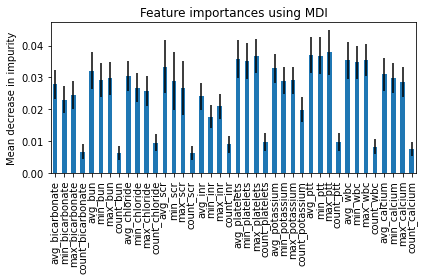

In [18]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#FEATURES SELECTION BASED ON THEIR IMPORTANCE WITH A RANDOM FOREST CLASSIFIER 
feature_names24 = [f'feature {i}' for i in range(X24.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train24, y_train24)

import time

start_time24 = time.time()
importances24 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time24 = time.time() - start_time24

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time24:.3f} seconds")

forest_importances24 = pd.Series(importances24, index=lab24.columns[2:])

fig, ax = plt.subplots()
forest_importances24.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [19]:
for i,v in enumerate(importances24):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02791
Feature: 1, Score: 0.02308
Feature: 2, Score: 0.02437
Feature: 3, Score: 0.00669
Feature: 4, Score: 0.03211
Feature: 5, Score: 0.02930
Feature: 6, Score: 0.02979
Feature: 7, Score: 0.00616
Feature: 8, Score: 0.03040
Feature: 9, Score: 0.02684
Feature: 10, Score: 0.02570
Feature: 11, Score: 0.00954
Feature: 12, Score: 0.03338
Feature: 13, Score: 0.02894
Feature: 14, Score: 0.02666
Feature: 15, Score: 0.00634
Feature: 16, Score: 0.02416
Feature: 17, Score: 0.01773
Feature: 18, Score: 0.02099
Feature: 19, Score: 0.00898
Feature: 20, Score: 0.03581
Feature: 21, Score: 0.03523
Feature: 22, Score: 0.03678
Feature: 23, Score: 0.00976
Feature: 24, Score: 0.03290
Feature: 25, Score: 0.02904
Feature: 26, Score: 0.02910
Feature: 27, Score: 0.01995
Feature: 28, Score: 0.03707
Feature: 29, Score: 0.03689
Feature: 30, Score: 0.03793
Feature: 31, Score: 0.00968
Feature: 32, Score: 0.03536
Feature: 33, Score: 0.03471
Feature: 34, Score: 0.03547
Feature: 35, Score: 0.00831
Fe

Elapsed time to compute the importances: 0.080 seconds


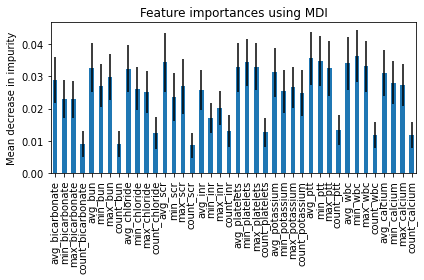

In [21]:
#DO IT FOR THE 48H DCW NOW
feature_names48 = [f'feature {i}' for i in range(X48.shape[1])]
#forest = RandomForestClassifier(random_state=0)
forest.fit(X_train48, y_train48)

start_time48 = time.time()
importances48 = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time48 = time.time() - start_time48

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time48:.3f} seconds")

forest_importances48 = pd.Series(importances48, index=lab48.columns[2:])

fig, ax = plt.subplots()
forest_importances48.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [22]:
for i,v in enumerate(importances48):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02890
Feature: 1, Score: 0.02305
Feature: 2, Score: 0.02286
Feature: 3, Score: 0.00902
Feature: 4, Score: 0.03268
Feature: 5, Score: 0.02715
Feature: 6, Score: 0.02974
Feature: 7, Score: 0.00896
Feature: 8, Score: 0.03247
Feature: 9, Score: 0.02620
Feature: 10, Score: 0.02520
Feature: 11, Score: 0.01257
Feature: 12, Score: 0.03446
Feature: 13, Score: 0.02369
Feature: 14, Score: 0.02694
Feature: 15, Score: 0.00863
Feature: 16, Score: 0.02577
Feature: 17, Score: 0.01710
Feature: 18, Score: 0.02029
Feature: 19, Score: 0.01311
Feature: 20, Score: 0.03285
Feature: 21, Score: 0.03436
Feature: 22, Score: 0.03305
Feature: 23, Score: 0.01262
Feature: 24, Score: 0.03131
Feature: 25, Score: 0.02544
Feature: 26, Score: 0.02659
Feature: 27, Score: 0.02493
Feature: 28, Score: 0.03560
Feature: 29, Score: 0.03489
Feature: 30, Score: 0.03259
Feature: 31, Score: 0.01332
Feature: 32, Score: 0.03405
Feature: 33, Score: 0.03642
Feature: 34, Score: 0.03314
Feature: 35, Score: 0.01170
Fe

### Apply the cross_validate( ) function now:

In [7]:
#DEFINE THE METRICS 
scoring=['accuracy','precision','recall', 'roc_auc', 'f1']

In [8]:
p24 = Pipeline(steps=[('r', resample), ('m', best24)])

scores24 = cross_validate(p24, X24, Y24, scoring = scoring, cv = 5)

In [9]:
scores24['test_accuracy'].mean()

0.6343407414448343

In [10]:
scores24['test_precision'].mean()

0.4015469113023187

In [11]:
scores24['test_recall'].mean()

0.4810856598054075

In [12]:
scores24['test_f1'].mean()

0.4377231710170533

In [13]:
scores24['test_roc_auc'].mean()

0.6208475242798951

In [14]:
p48 = Pipeline(steps=[('r', resample), ('m', best48)])

scores48 = cross_validate(p48, X48, Y48, scoring = scoring, cv = 5)

In [15]:
scores48['test_accuracy'].mean()

0.6195629491951491

In [16]:
scores48['test_precision'].mean()

0.29828460060874606

In [17]:
scores48['test_recall'].mean()

0.46225550842464946

In [18]:
scores48['test_f1'].mean()

0.36249293384626824

In [19]:
scores48['test_roc_auc'].mean()

0.5772815220103453